## GR5241 Homework 3
### Name: Kangshuo Li           UNI: kl3259

#### 3. (b) ii. 

In [1]:
# # 3. (b) ii. 
# import numpy as np
# from numpy import linalg
# sigma = np.array([
#     [6, -3, 0], 
#     [-3, 6, 0],
#     [0, 0, 10]]
# )

# result = linalg.svd(sigma)
# cnt = 0
# for item in result:
#     print(item)
#     print('\n')
#     cnt += 1
#     if cnt == 2:
#         break

### 5.
![](GR5241_HW3_Q5_1.png)
![](GR5241_HW3_Q5_2.png)

In [2]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.mixture import GaussianMixture
from sklearn.mixture import BayesianGaussianMixture
import matplotlib
import scipy
from scipy import stats
from matplotlib import pyplot as plt
import time
import os
os.getcwd()

'/Users/kangshuoli/Documents/VScode_workspace/GR5241/GR5241_HW3'

#### (a)

In [3]:
# read in data
raw_df = pd.read_table(
    'hw3_Q5.txt', 
    header = None, 
    sep = ' '
)
raw_df = raw_df.iloc[:,np.arange(5)]
raw_df.shape
raw_df.head()

,0,1,2,3,4
0,3.805564,5.384041,4.564335,4.266158,7.348113
1,-2.545971,-2.601637,-2.910390,-3.785392,-6.392758
2,-4.667780,-3.411962,-3.442990,-4.115973,-8.019540
3,0.766852,-0.386541,-0.200627,-0.057678,0.505778
4,-0.207983,-0.104326,0.016167,0.368387,-0.096917


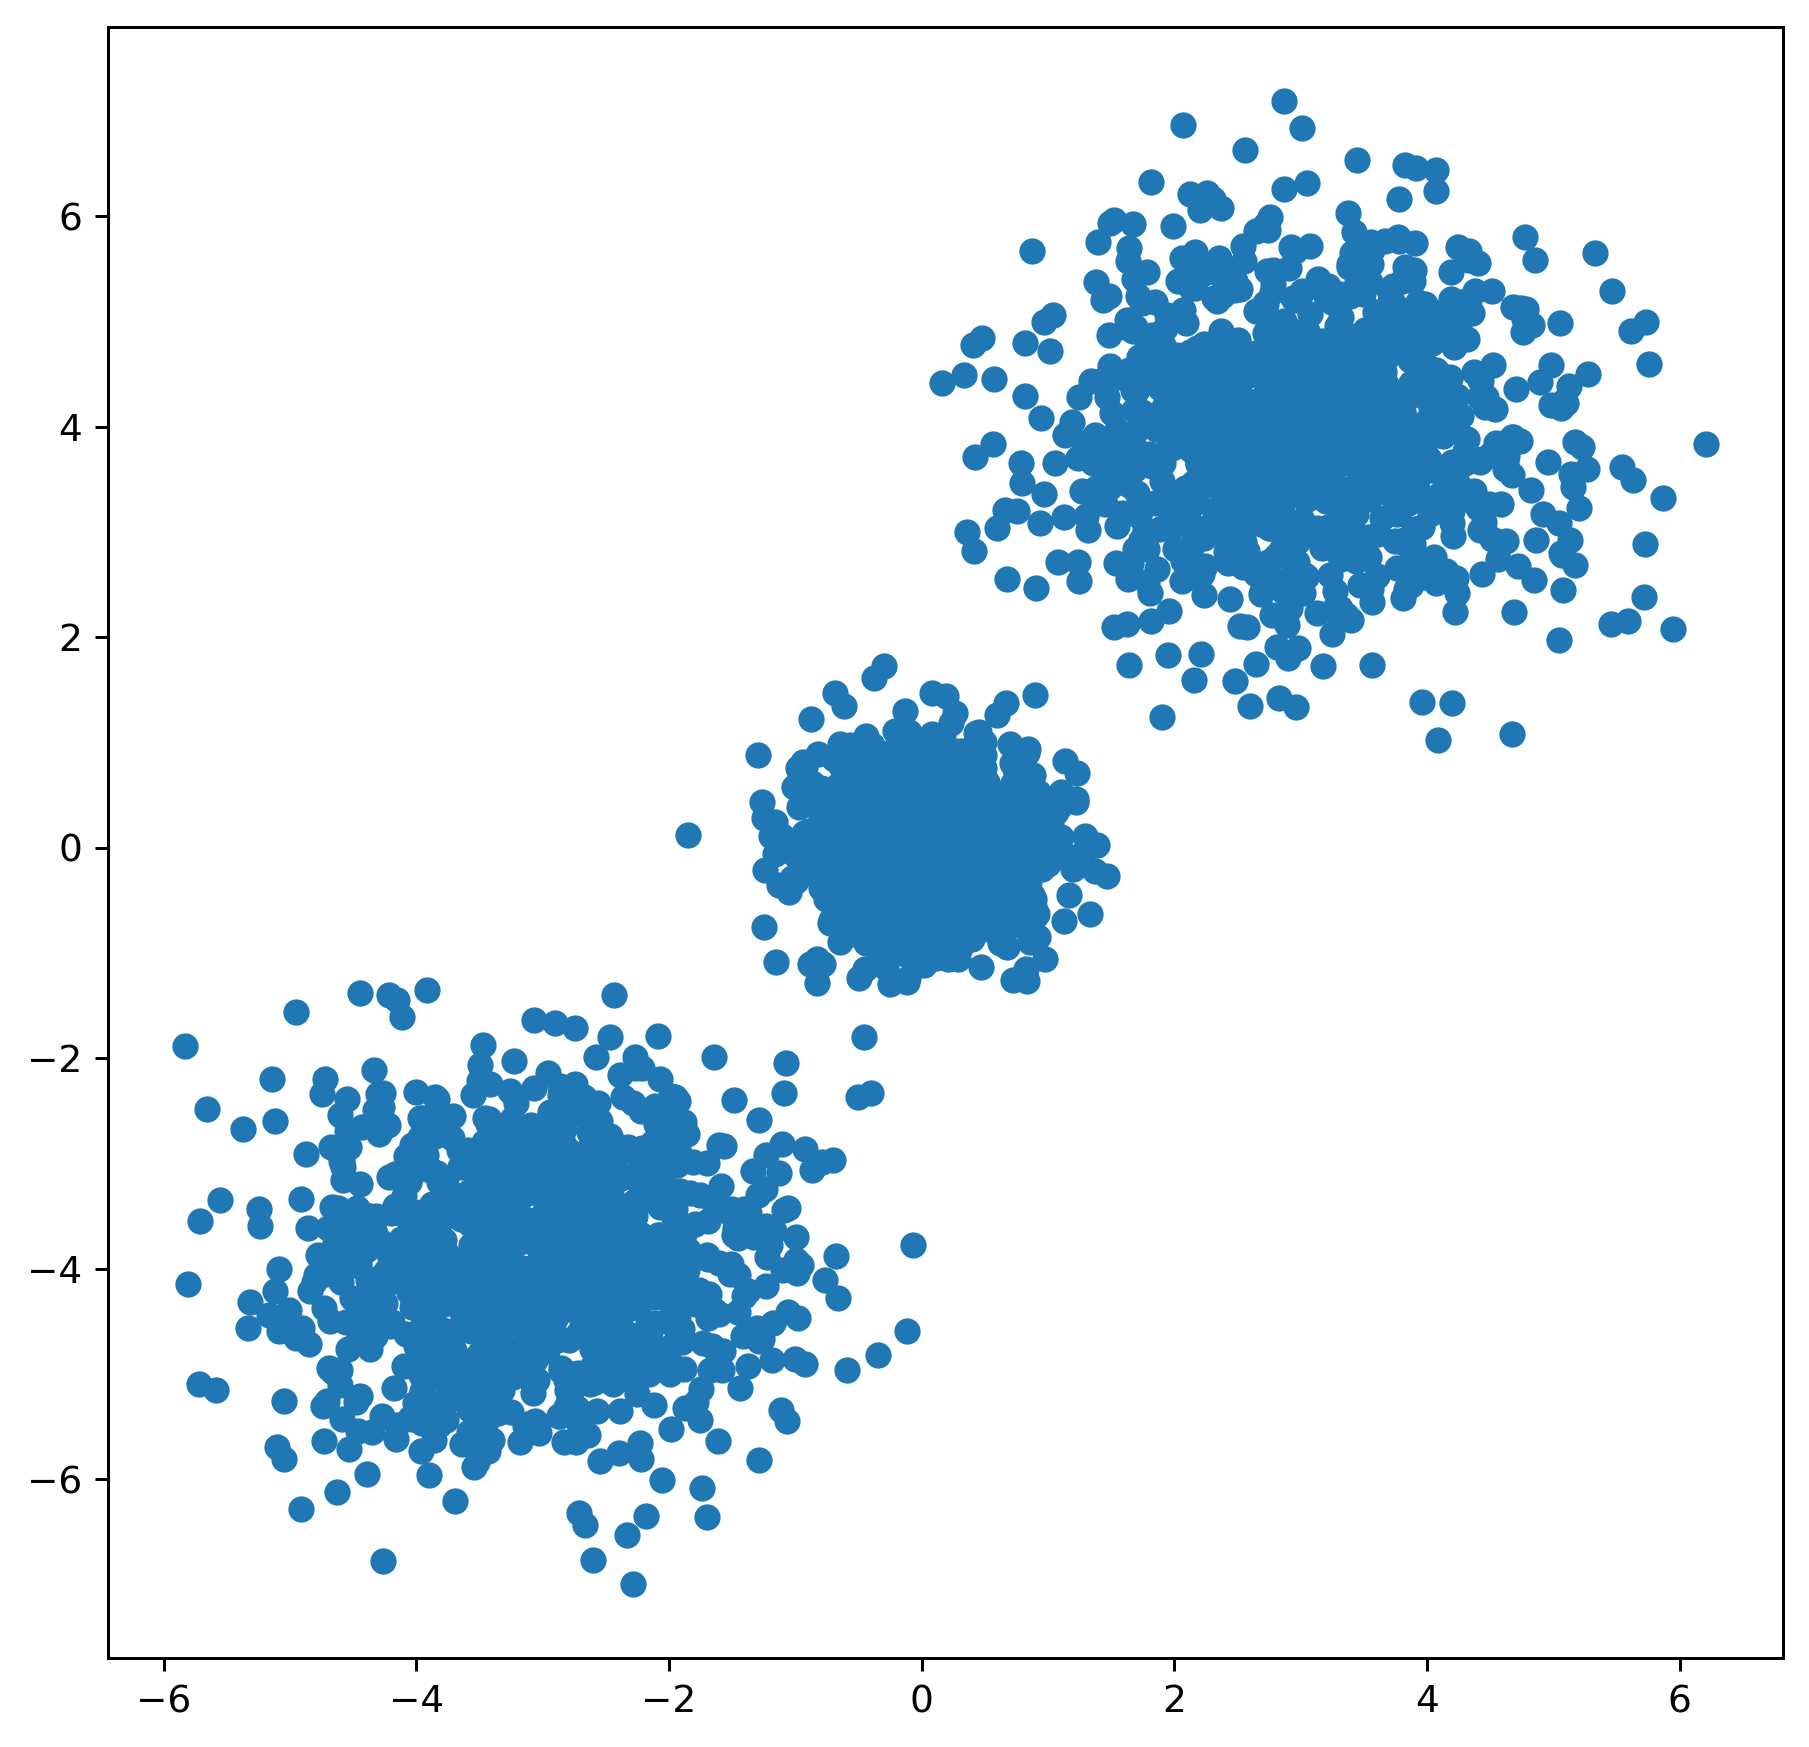

In [4]:
fig, ax = plt.subplots(1, 1, figsize = (8,8), dpi = 270)
ax.scatter(raw_df.iloc[:,0], raw_df.iloc[:,1])

In [5]:
# instantiate the gmm
gmm = GaussianMixture(
    n_components = 3, 
    random_state = 42, 
    covariance_type = 'spherical', 
    tol = 0.001, 
    n_init = 10,
    init_params = 'random'
)

# fit the model
gmm.fit(X = raw_df)

print(f'The mean vectors are: \n {gmm.means_}\n')
print(f'The sigmas are: \n{gmm.covariances_}')
print(f'The standard deviations for each cluster are: \n {np.sqrt(np.array(gmm.covariances_))}')


The mean vectors are: 
 [[-3.06176428e+00 -3.96696240e+00 -5.02048769e+00 -5.02021252e+00
  -6.00420335e+00]
 [ 2.99520441e+00  3.97929290e+00  4.93552594e+00  4.95000613e+00
   6.02926365e+00]
 [ 1.05250251e-02  4.16618640e-03  1.35683863e-02  1.00207924e-02
  -2.47443547e-02]]

The sigmas are: 
[0.96995605 0.97851816 0.24586219]
The standard deviations for each cluster are: 
 [0.98486347 0.98920077 0.49584492]


Since we assume that the cluster with lowest mean $\mu_{i1}$ is cluster 1 with mean $\mu_1$ and covariance $\Sigma_1$ based on standard deviation $\sigma_1$, and the middle one with $\mu_{i1}$ is cluster 2, and cluster 3 is the one with largest $\mu_{i1}$. Thus, we can find that $\mu_1 = (-3.0618, -3.9670, -5.0205, -5.0202, -6.0042)$, $\mu_2 = (0.0105, 0.0042, 0.0136, 0.0100, -0.0247)$, $\mu_3 = (2.9952, 3.9793, 4.9355, 4.9500, 6.0293)$. Their corresponding standard deviations are: $\sigma_1 = 0.9849$, $\sigma_2 = 0.4958$, $\sigma_3 = 0.9892$. 

#### (b)

In [6]:
gmm_rand = GaussianMixture(
    n_components = 3, 
    random_state = 42, 
    covariance_type = 'spherical', 
    tol = 0.001, 
    n_init = 10,
    init_params = 'random'
)
gmm_rand.fit(X = raw_df)

gmm_kmeans = GaussianMixture(
    n_components = 3, 
    random_state = 42, 
    covariance_type = 'spherical', 
    tol = 0.001, 
    n_init = 10,
    init_params = 'kmeans'
)
gmm_kmeans.fit(X = raw_df)

print(f'GMM with random initialization converges in {gmm_rand.n_iter_} iterations.')
print(f'GMM with Kmeans initialization converges in {gmm_kmeans.n_iter_} iterations.')

GMM with random initialization converges in 7 iterations.
GMM with Kmeans initialization converges in 2 iterations.


Gaussian mixture model with pre-initialization with Kmeans converges in 2 iterations while GMM with random initialization converges in 7 iterations. 

#### (c)

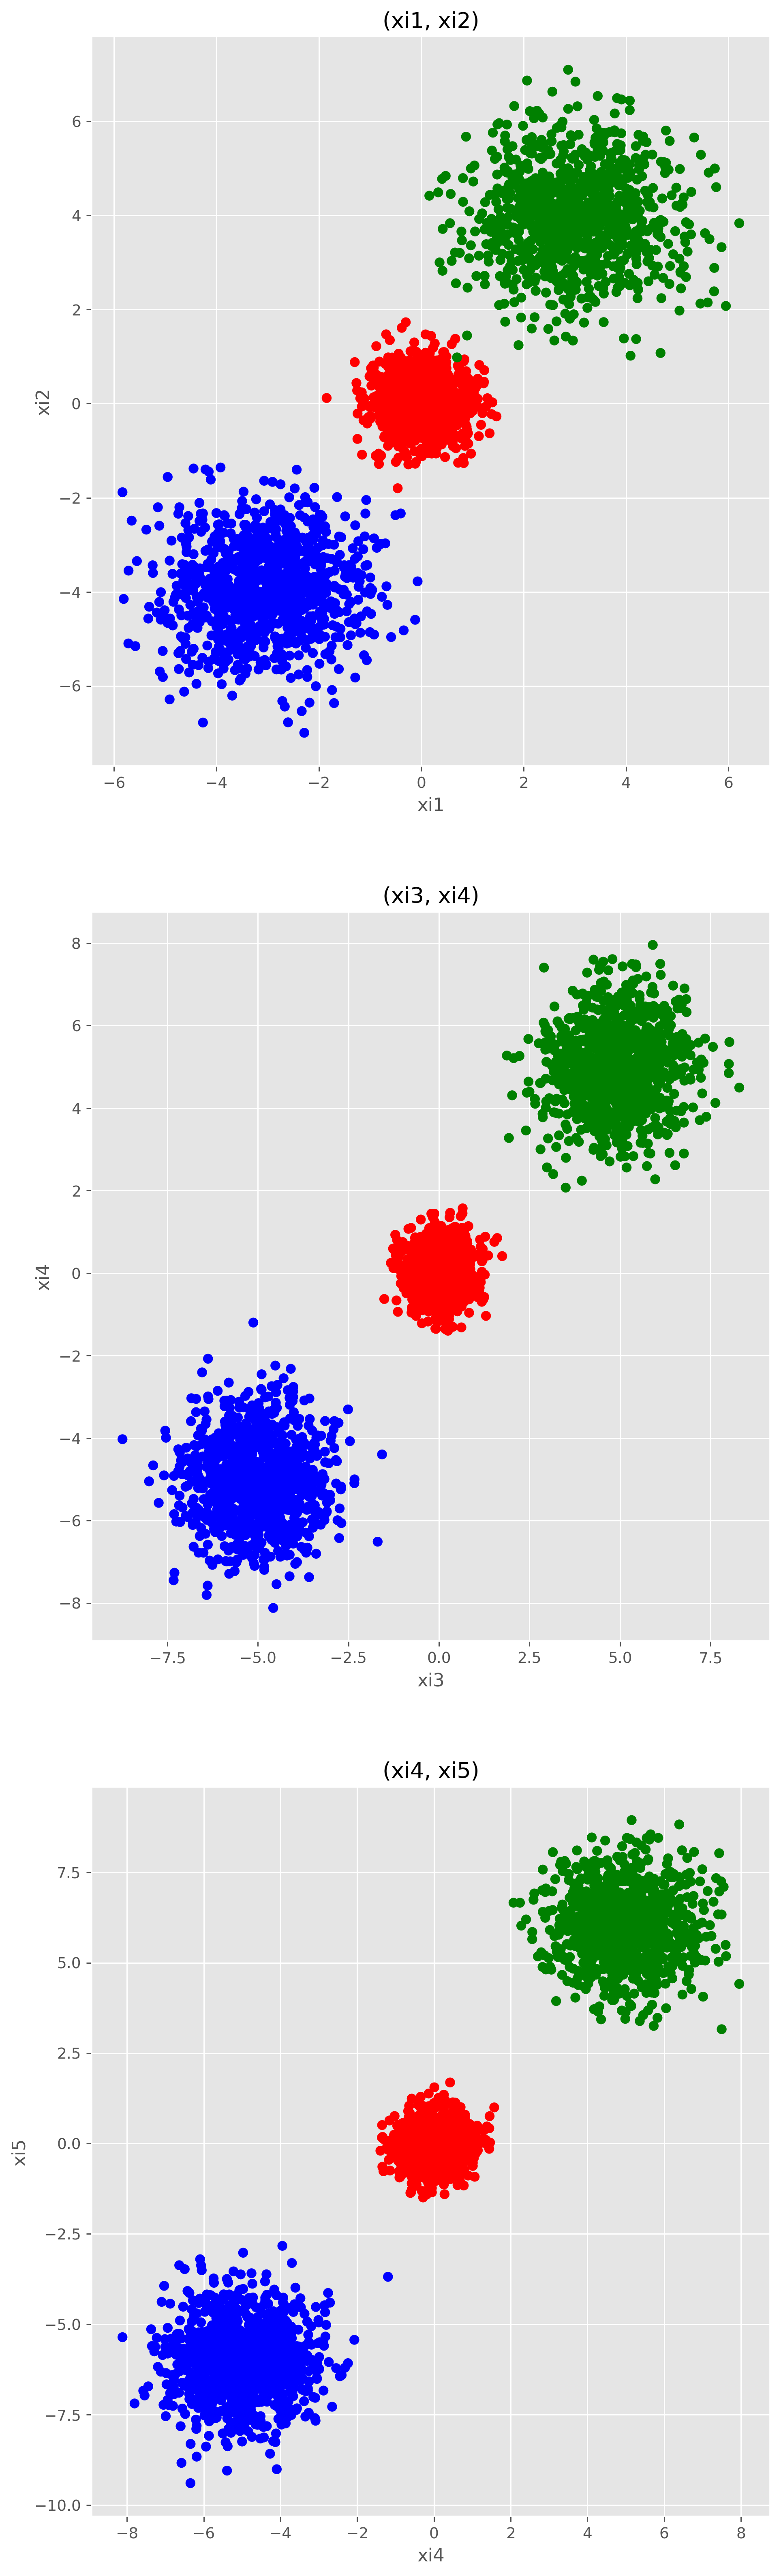

In [7]:
# plot with cluster labels
prediction = gmm.predict(raw_df)
color_dict = {
    0: "blue", 
    1: "green", 
    2: "red"
}
color_list = [color_dict[item] for item in prediction]
# first two dimensions (xi1, xi2)
plt.style.use("ggplot")
fig, ax = plt.subplots(3, 1, figsize = (8,30), dpi = 270)
ax[0].scatter(raw_df.iloc[:,0], raw_df.iloc[:,1], c = color_list)
ax[0].set_title("(xi1, xi2)")
ax[0].set_xlabel("xi1")
ax[0].set_ylabel("xi2")

ax[1].scatter(raw_df.iloc[:,2], raw_df.iloc[:,3], c = color_list)
ax[1].set_title("(xi3, xi4)")
ax[1].set_xlabel("xi3")
ax[1].set_ylabel("xi4")

ax[2].scatter(raw_df.iloc[:,3], raw_df.iloc[:,4], c = color_list)
ax[2].set_title("(xi4, xi5)")
ax[2].set_xlabel("xi4")
ax[2].set_ylabel("xi5")

plt.show()

According to this plot, the computed means are consistent with the graphs. 

#### (d)

In [36]:
from scipy import stats
from numpy import linalg
%xmode plain
tol = 0.001
# reuse result in part (a)
pi_1 = gmm.weights_[0]
pi_2 = gmm.weights_[2]
pi_3 = gmm.weights_[1]
weights_list = [pi_1, pi_2, pi_3]
sigma_1 = np.sqrt(np.array(gmm.covariances_[0]))
sigma_2 = np.sqrt(np.array(gmm.covariances_[2]))
sigma_3 = np.sqrt(np.array(gmm.covariances_[1]))
sigmas_list = [sigma_1, sigma_2, sigma_3]
def my_EM(weights_list_, sigmas_list_, K_ = 3, data_ = raw_df, tol_ = 0.001):
    # the parameters to be figured out are mean vectors
    def normal_dist(x_, mu_, sigma_):
        SIGMA = sigma_ ** 2 * np.eye(mu_.shape[1]) # d * d
        return (1 / np.sqrt(2 * np.pi * linalg.det(SIGMA))) * np.exp((- 1 / 2) * (x_ - mu_) @ linalg.inv(SIGMA) @ (x_ - mu_).T)

    # get the number of features and number of datapoints
    n = data_.shape[0]
    d = data_.shape[1]
    mean_vecs_list = []
    # Initialization: Random guesses between the minimum and maximum value of each feature
    # get K_ random gusses
    for i in np.arange(K_):
        temp_mean = np.random.normal(loc = np.mean(data_.mean()), scale = np.mean(data_.std(axis = 1)), size = (1,d))
        mean_vecs_list.append(temp_mean) # 1 * d
    parameter_difference = 10000 # a large value
    responsibility_array = np.zeros((n, K_))
    # Terminate if the mean difference of parameters <= tol
    cnt = 0
    while parameter_difference > tol_:
        prev_mean_vec = mean_vecs_list
        if weights_list_ != None:
            # only estimate mean vectors
            # Expectation step
            # calculate responsibilities
            for i in np.arange(n):
                denom_vec = np.zeros((K_, 1))
                for j in np.arange(K_):
                    # for each datapoint in every class
                    denom_vec[j] = weights_list_[j] * normal_dist(
                        x_ = data_.iloc[i,:].values.reshape(1,-1), 
                        mu_ = mean_vecs_list[j], 
                        sigma_ = sigmas_list_[j]
                    )
                denom_sum = np.sum(denom_vec)
                for j in np.arange(K_):
                    responsibility_array[i,j] = denom_vec[j] / denom_sum
            # Maximization step
            # only update mean vector
            for j in np.arange(K_):
                # for each class
                numer_m_list = []
                denom_m_list = []
                for i in np.arange(n):
                    # for each datapoint
                    denom_m_list.append(responsibility_array[i,j])
                    numer_m_list.append(responsibility_array[i,j] * data_.iloc[i,:].values.reshape(1,-1))
                # calculate new mean vectors
                mean_vecs_list[j] = np.sum(numer_m_list, axis = 0) / np.sum(denom_m_list) # should be array of 1 * d
            # finish iteration
            # calculate parameter difference
            cnt += 1
            print(f'Iteration: {cnt}')
            print(f'Current mean vectors: {mean_vecs_list}')
            if cnt > 1:
                parameter_difference = np.sum(np.abs(np.array(prev_mean_vec) - np.array(mean_vecs_list)))
        else:
            # part (e): estimate mus and component probabilites simultaneously
            print('part(e)')

    return mean_vecs_list

# reuse result in part (a)
mean_vecs_d = my_EM(
    weights_list_ = weights_list, 
    sigmas_list_ = sigmas_list, 
    K_ = 3, 
    data_ = raw_df, 
    tol_ = tol
)
print(f'Final result: {mean_vecs_d}')

Exception reporting mode: Plain
Iteration: 1
Current mean vectors: [array([[-3.05333185, -3.96057539, -5.00569445, -5.0078454 , -5.98731163]]), array([[ 0.1811099 , -0.19381029,  0.79169694,  0.60323946,  0.50901199]]), array([[1.51766868, 2.01882133, 2.49262875, 2.5016151 , 3.02998857]])]
Iteration: 2
Current mean vectors: [array([[-3.06176428, -3.9669624 , -5.02048769, -5.02021252, -6.00420335]]), array([[ 0.01052293,  0.00408452,  0.01359553,  0.01003418, -0.02475788]]), array([[2.99500885, 3.97911132, 4.93517286, 4.9496656 , 6.02887626]])]
Final result: [array([[-3.06176428, -3.9669624 , -5.02048769, -5.02021252, -6.00420335]]), array([[ 0.01052293,  0.00408452,  0.01359553,  0.01003418, -0.02475788]]), array([[2.99500885, 3.97911132, 4.93517286, 4.9496656 , 6.02887626]])]


We can see that the result from my_EM() is close to the result by sklearn. 

#### (e)

In [43]:
def my_EM(weights_list_, sigmas_list_, K_ = 3, data_ = raw_df, tol_ = 0.001):
    # the parameters to be figured out are mean vectors
    def normal_dist(x_, mu_, sigma_):
        SIGMA = sigma_ ** 2 * np.eye(mu_.shape[1]) # d * d
        return (1 / np.sqrt(2 * np.pi * linalg.det(SIGMA))) * np.exp((- 1 / 2) * (x_ - mu_) @ linalg.inv(SIGMA) @ (x_ - mu_).T)

    # get the number of features and number of datapoints
    n = data_.shape[0]
    d = data_.shape[1]
    mean_vecs_list = []
    # Initialization: Random guesses between the minimum and maximum value of each feature
    # get K_ random gusses
    for i in np.arange(K_):
        temp_mean = np.random.normal(loc = np.mean(data_.mean()), scale = np.mean(data_.std(axis = 1)), size = (1,d))
        mean_vecs_list.append(temp_mean) # 1 * d
    if weights_list_ == None:
        # initialization of weights
        raw_weights = np.abs(np.random.normal(loc = 0.5, scale = 0.5, size = (1,3)))
        weights_list = (raw_weights / np.sum(raw_weights))[0]
    parameter_difference = 10000 # a large value
    responsibility_array = np.zeros((n, K_))
    # Terminate if the mean difference of parameters <= tol
    cnt = 0
    while parameter_difference > tol_:
        prev_mean_vec = mean_vecs_list
        prev_weight_vec = weights_list
        if weights_list_ != None:
            # only estimate mean vectors
            # Expectation step
            # calculate responsibilities
            for i in np.arange(n):
                denom_vec = np.zeros((K_, 1))
                for j in np.arange(K_):
                    # for each datapoint in every class
                    denom_vec[j] = weights_list_[j] * normal_dist(
                        x_ = data_.iloc[i,:].values.reshape(1,-1), 
                        mu_ = mean_vecs_list[j], 
                        sigma_ = sigmas_list_[j]
                    )
                denom_sum = np.sum(denom_vec)
                for j in np.arange(K_):
                    responsibility_array[i,j] = denom_vec[j] / denom_sum
            # Maximization step
            # only update mean vector
            for j in np.arange(K_):
                # for each class
                numer_m_list = []
                denom_m_list = []
                for i in np.arange(n):
                    # for each datapoint
                    denom_m_list.append(responsibility_array[i,j])
                    numer_m_list.append(responsibility_array[i,j] * data_.iloc[i,:].values.reshape(1,-1))
                # calculate new mean vectors
                mean_vecs_list[j] = np.sum(numer_m_list, axis = 0) / np.sum(denom_m_list) # should be array of 1 * d
            # finish iteration
            # calculate parameter difference
            cnt += 1
            print(f'Iteration: {cnt}')
            print(f'Current mean vectors: {mean_vecs_list}')
            if cnt > 1:
                parameter_difference = np.sum(np.abs(np.array(prev_mean_vec) - np.array(mean_vecs_list)))
        else:
            # part (e): estimate mus and component probabilites simultaneously
            # Expectation step
            # calculate responsibilities
            for i in np.arange(n):
                denom_vec = np.zeros((K_, 1))
                for j in np.arange(K_):
                    # for each datapoint in every class
                    denom_vec[j] = weights_list[j] * normal_dist(
                        x_ = data_.iloc[i,:].values.reshape(1,-1), 
                        mu_ = mean_vecs_list[j], 
                        sigma_ = sigmas_list_[j]
                    )
                denom_sum = np.sum(denom_vec)
                for j in np.arange(K_):
                    responsibility_array[i,j] = denom_vec[j] / denom_sum
            # Maximization step
            # update mean vector and update weights
            for j in np.arange(K_):
                # for each class
                numer_m_list = []
                denom_m_list = []
                for i in np.arange(n):
                    # for each datapoint
                    denom_m_list.append(responsibility_array[i,j])
                    numer_m_list.append(responsibility_array[i,j] * data_.iloc[i,:].values.reshape(1,-1))
                # calculate new mean vectors
                mean_vecs_list[j] = np.sum(numer_m_list, axis = 0) / np.sum(denom_m_list) # should be array of 1 * d
                weights_list[j] = np.sum(denom_m_list) / n
            # finish iteration
            # calculate parameter difference
            cnt += 1
            print(f'Iteration: {cnt}')
            print(f'Current mean vectors: {mean_vecs_list}')
            print(f'Current weights: {weights_list}')
            if cnt > 1:
                parameter_difference = np.sum(np.sum(np.abs(np.array(prev_mean_vec) - np.array(mean_vecs_list))) + np.sum(np.abs(np.array(prev_weight_vec) - np.array(weights_list))))

    return mean_vecs_list, weights_list

# reuse result in part (a)
mean_vecs_e, weights_e = my_EM(
    weights_list_ = None, 
    sigmas_list_ = sigmas_list, 
    K_ = 3, 
    data_ = raw_df, 
    tol_ = tol
)
print(f'Final result: \nMean vectors:{mean_vecs_e}\nWeights: {weights_e}')

Iteration: 1
Current mean vectors: [array([[2.90558503, 4.11617451, 4.54231803, 4.9492761 , 6.24570901]]), array([[ 0.13157246, -0.06892724, -0.04883139, -0.15200753,  0.17500178]]), array([[-1.12103928, -1.45939437, -1.66808686, -1.77850294, -2.31100208]])]
Current weights: [0.21813464 0.17883813 0.60302723]
Iteration: 2
Current mean vectors: [array([[2.99520441, 3.9792929 , 4.93552594, 4.95000613, 6.02926365]]), array([[ 0.01485625,  0.00701655,  0.01644876,  0.01341855, -0.01817774]]), array([[-3.03534734, -3.93012366, -4.97307025, -4.97334029, -5.95096337]])]
Current weights: [0.33333333 0.3299731  0.33669356]
Final result: 
Mean vectors:[array([[2.99520441, 3.9792929 , 4.93552594, 4.95000613, 6.02926365]]), array([[ 0.01485625,  0.00701655,  0.01644876,  0.01341855, -0.01817774]]), array([[-3.03534734, -3.93012366, -4.97307025, -4.97334029, -5.95096337]])]
Weights: [0.33333333 0.3299731  0.33669356]


The results from estimating weights and mean vectors simultaneously are close to the result in part (a). 